In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from matplotlib import ticker, cm
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import os, sys
import netCDF4
import f90nml as f90
import CQL3D_Analysis
from scipy.interpolate import PchipInterpolator
import h5py

In [4]:
def save_figure_data_to_hdf5(fig, filename='figure_data.h5'):
    with h5py.File(filename, 'w') as hdf:
        for ax_idx, ax in enumerate(fig.get_axes()):
            ax_group = hdf.create_group(f'axes_{ax_idx}')
            for line_idx, line in enumerate(ax.get_lines()):
                line_group = ax_group.create_group(f'line_{line_idx}')
                x_data = line.get_xdata()
                y_data = line.get_ydata()
                line_group.create_dataset('x', data=x_data)
                line_group.create_dataset('y', data=y_data)

In [3]:
# compare dimentions
diiid_circumference =  2*np.pi*1.001

f1 = 96e6
harmonic = 7
f2 = f1*(harmonic/8)
print(f2/1e6, ' MHz')
npar = 5
c=3e8
lam_par1 = (c/f1)/npar
lam_par2 = (c/f2)/npar
print('lam_par1/4: ', lam_par1/4)
print('lam_par2/4: ', lam_par2/4)
print('lam_par1/4*12: ', 12*lam_par1/4)
print('lam_par2/4*12: ', 12*lam_par2/4)
print('diiid circum. ', diiid_circumference)
print('lam_par1/4*12/diiid_circ: ', 12*lam_par1/4/diiid_circumference)
print('lam_par2/4*12/diiid_circ: ', 12*lam_par2/4/diiid_circumference)


print('(lam_par1/4*12 + 2*.16)/diiid_circ: ', (12*lam_par1/4 + 2*.16)/diiid_circumference)
mD = 3.343e-27
OmegaD = 1.6022e-19*1.6621/(mD)
f = OmegaD/(2*np.pi)
print(f)
print(8*f)
print(2*np.pi*f1*mD/1.6022e-19/8)

84.0  MHz
lam_par1/4:  0.15625
lam_par2/4:  0.17857142857142858
lam_par1/4*12:  1.875
lam_par2/4*12:  2.142857142857143
diiid circum.  6.289468492486765
lam_par1/4*12/diiid_circ:  0.29811740089640737
lam_par2/4*12/diiid_circ:  0.34070560102446557
(lam_par1/4*12 + 2*.16)/diiid_circ:  0.34899610398272757
12678200.975437377
101425607.80349901
1.573188501952417


In [5]:
eqdsk_file = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/g147634.04525"
cql3d_nc_file = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/cql3d_both_signs_both_beams.nc"
cql3d_krf_nc_file = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/cql3d_krf_both_signs_both_beams.nc"
cqlin_file = None#"

cql_pp = CQL3D_Analysis.CQL3D_Post_Process(
    gen_species_names=["D", "e"],
    cql3d_nc_file=cql3d_nc_file,
    cql3d_krf_file=cql3d_krf_nc_file,
    eqdsk_file=eqdsk_file,
    cql_input_file=cqlin_file,
)

print(cql_pp.eqdsk['bcentr'])
print(cql_pp.eqdsk['rmaxis'])
print(cql_pp.eqdsk['rcentr'])
print(cql_pp.eqdsk.keys())
print(min(cql_pp.eqdsk['rlim']))
print(cql_pp.eqdsk['zmaxis'])

['   90   86\n']
1.662176343
1.77750061
1.69550002
dict_keys(['nW', 'nH', 'nbbbs', 'limitr', 'rdim', 'zdim', 'rcentr', 'rleft', 'zmid', 'rmaxis', 'zmaxis', 'simag', 'sibry', 'bcentr', 'current', 'fpol', 'pres', 'ffprim', 'pprime', 'psizr', 'qpsi', 'rbbbs', 'zbbbs', 'rlim', 'zlim', 'r', 'z', 'fluxGrid', 'iiInside'])
1.001
-0.0231968987


In [6]:
float(cql_pp.getBStrength(1.5,0))
Rc = cql_pp.eqdsk['rcentr']
Zc = cql_pp.eqdsk['zmaxis']
cql_pp.getpsirzNorm(Rc, Zc)

array([[0.02327323]])

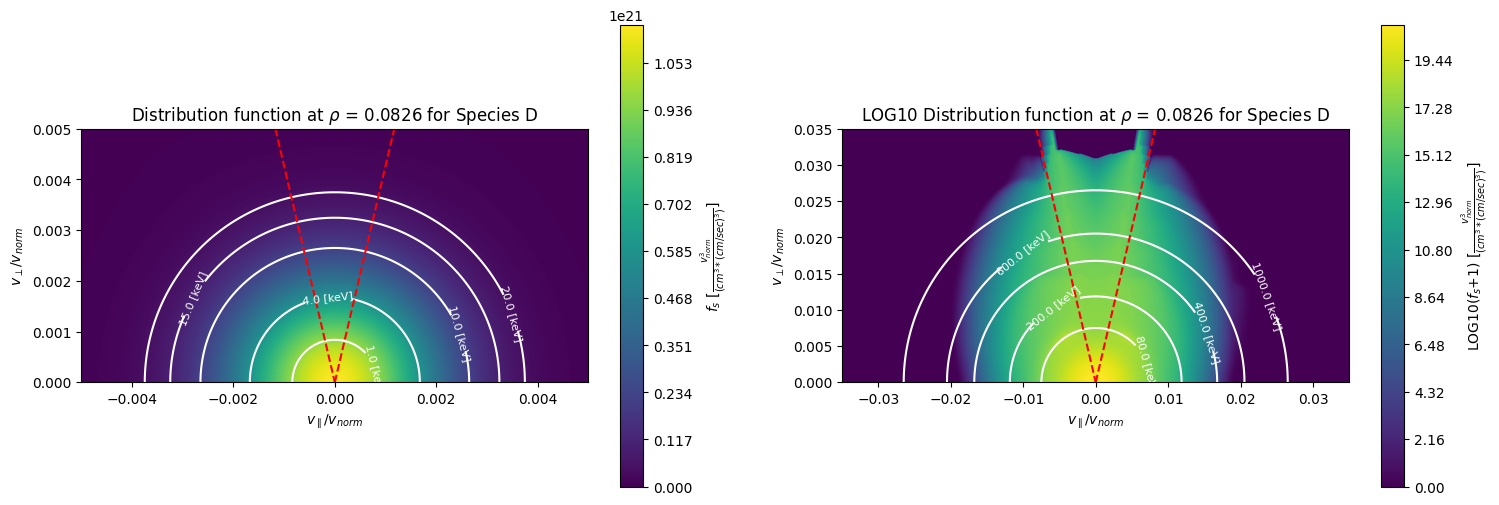

In [7]:
rho_index=4#2
cql_pp.plot_species_distribution_function_at_rho(
    gen_species_index=0,
    rho_index=rho_index,
    figsize=(18, 6),
    cmap="viridis",
    v_norm_over_v_max=0.005,
    log_scale_axis_multiple=7,
    energy_levels_linear=[1, 4, 10, 15, 20],
    energy_levels_log=[80, 200, 400, 600, 1000],
    energy_color="white",
    plot_trapped_passing=True,
)

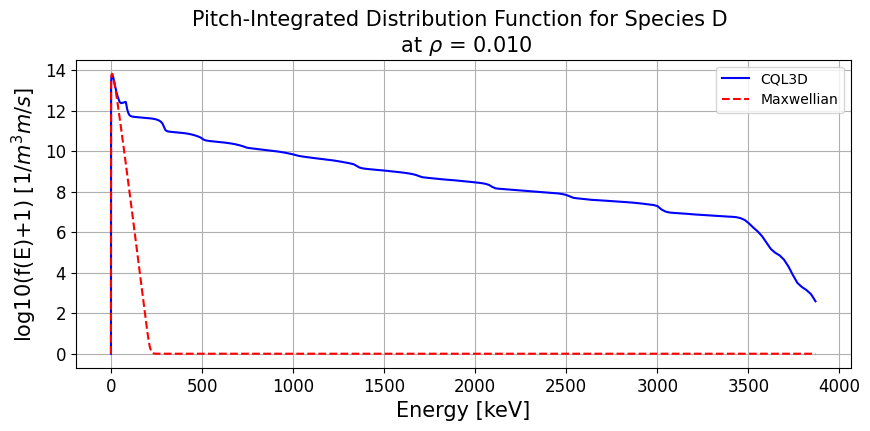

In [8]:
cql_pp.plot_pitch_integrated_distribution_function_versus_maxwellian(
    nmax=5.97e19,
    Tmax=5.89,
    gen_species_index=0,
    rho_index=0,
    Emax_keV=3900,
    ylim=None,
    figsize=(10, 4),
    log10=True,
    color="blue",
    maxwell_color="red",
)

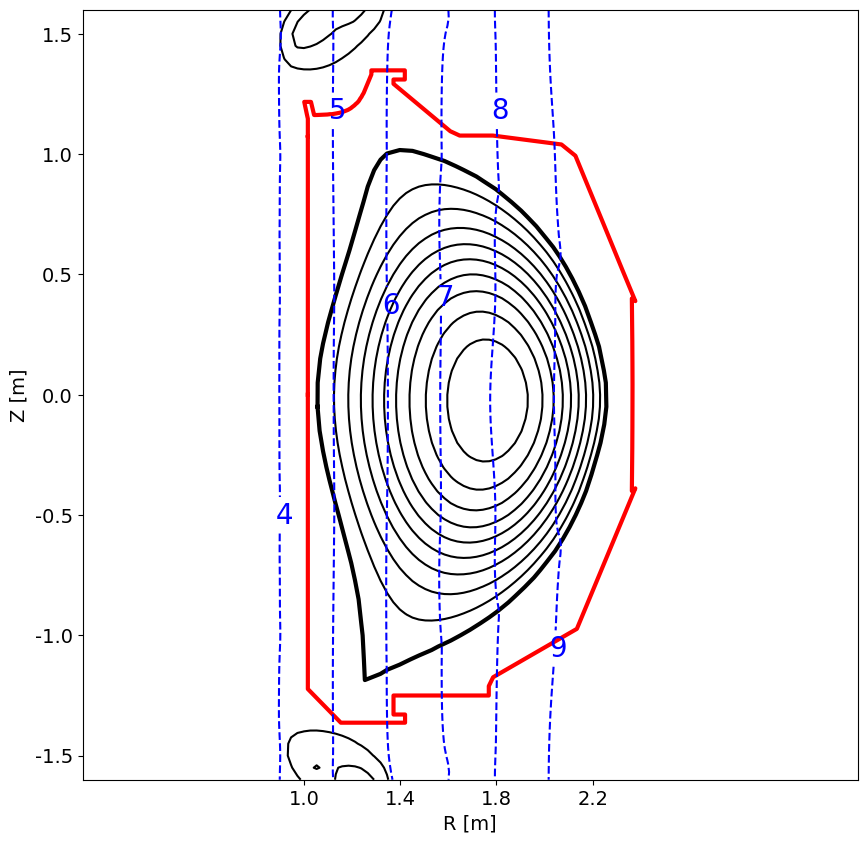

In [9]:
fig, ax = cql_pp.plot_cyclotron_harmonics(
    frequency=96e6,
    harmonics=[4,5,6,7,8,9],
    species_mass=cql_pp.species_mass[0],
    species_charge=cql_pp.species_charges[0],
    r_resolution=100,
    z_resolution=100,
    levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    figsize=(10, 10),
    harmonic_color="blue",
    return_plot=True,
)

plt.savefig('harmonics.png')

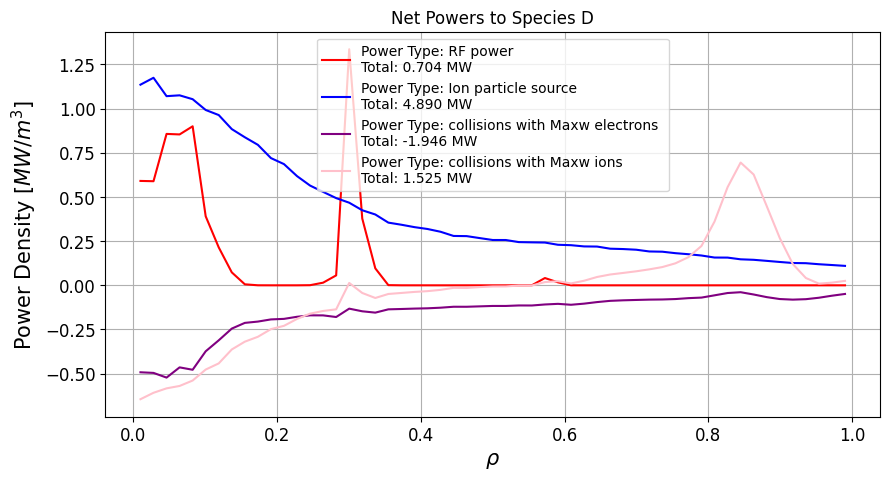

In [10]:
power_types = [
    "RF power",
    "Ion particle source",
    "collisions with Maxw electrons",
    "collisions with Maxw ions",
]
colors = ["red", "blue", "purple", "pink"]

cql_pp.plot_powers_vs_rho(
    gen_species_index=0, power_types=power_types, figsize=(10, 5), colors=colors
)

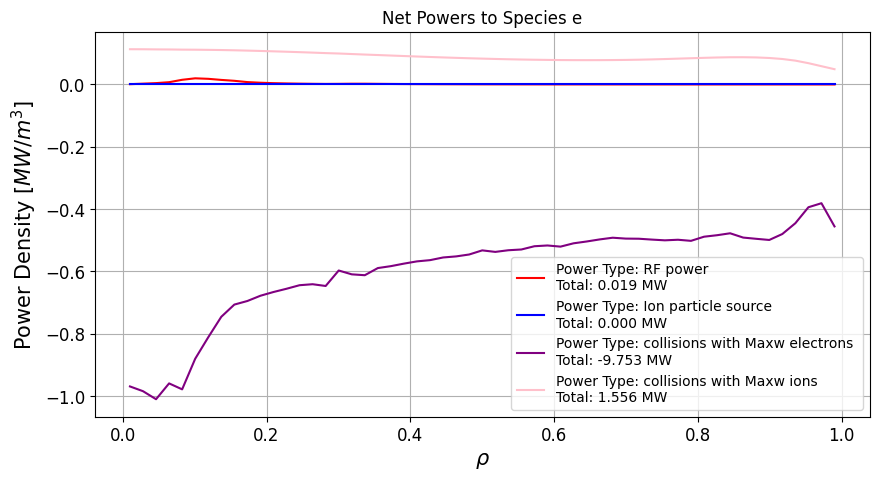

In [11]:
power_types = [
    "RF power",
    "Ion particle source",
    "collisions with Maxw electrons",
    "collisions with Maxw ions",
]
colors = ["red", "blue", "purple", "pink"]

cql_pp.plot_powers_vs_rho(
    gen_species_index=1, power_types=power_types, figsize=(10, 5), colors=colors
)

In [12]:
# calculate RF powers to species 
total_ionRF_power = cql_pp.get_power_vs_rho(gen_species_index=0, power_type='RF power')[1]
total_eRF_power = cql_pp.get_power_vs_rho(gen_species_index=1, power_type='RF power')[1]

print(f'Total ion RF power: {total_ionRF_power} MW')
print(f'Total elc RF power: {total_eRF_power} MW')

ionfrac = total_ionRF_power / (total_ionRF_power + total_eRF_power)
elecfrac = total_eRF_power / (total_ionRF_power + total_eRF_power)
print(f'Total ion RF power frac: {ionfrac*100} %')
print(f'Total elc RF power frac: {elecfrac*100} %')

Total ion RF power: 0.7044384418637039 MW
Total elc RF power: 0.019049626810772782 MW
Total ion RF power frac: 97.36697429638693 %
Total elc RF power frac: 2.6330257036130744 %


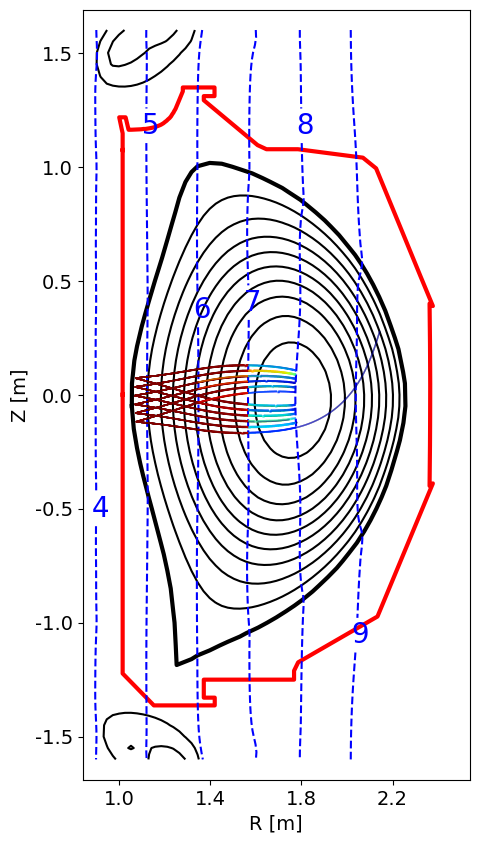

In [13]:
fig, ax = cql_pp.plot_cyclotron_harmonics(
    frequency=96e6,
    harmonics=[4,5,6,7,8,9],
    species_mass=cql_pp.species_mass[0],
    species_charge=cql_pp.species_charges[0],
    r_resolution=100,
    z_resolution=100,
    levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    figsize=(5, 10),
    harmonic_color="blue",
    plot_rays=True,
    maxDelPwrPlot=0.99,
    return_plot=True,
)

In [14]:
# distribution function plot

# assign interpolators for the density and temperature profile from cql. 
ryain = np.array([0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24,
     0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52,
     0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8,
     0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0,])
nein = np.array([60000000000000.0, 59962941237520.016, 59867250566342.87,
     59703838452127.08, 59485184853022.37, 59205556569110.03,
     58872591209671.39, 58485106557533.81, 58045531370610.305,
     57558573577903.8, 57020188242888.29, 56438639988791.0, 55813573292710.45,
     55146955340815.76, 54444837877610.28, 53709946180354.79,
     52945027091694.945, 52158112415694.79, 51354626109057.195,
     50540946881032.766, 49723710007237.66, 48910511576005.12,
     48108497631514.016, 47324015547571.586, 46564296560072.016,
     45836417796426.48, 45144012723240.39, 44491164589062.91,
     43883204016679.27, 43323551556545.4, 42812289319189.98,
     42352151810909.12, 41951558842993.96, 41609572556377.09,
     41331550550812.77, 41126059334256.52, 41004351836888.71,
     40967930525976.56, 41001246650804.64, 41077805833778.766,
     41164545982618.14, 41219666259056.3, 41189628109070.07,
     40990780018190.04, 40529881759768.45, 39635090395688.4,
     38087958508710.875, 35530224262919.92, 31393189052966.008,
     25174433055907.145, 16795637554512.268])*1e6

Tiin = np.array([5.92374674, 5.91900084, 5.90670508, 5.88559939, 5.85722756, 5.82074303,
     5.77706113, 5.7259194, 5.66752697, 5.60242007, 5.52987086, 5.45091806,
     5.36533523, 5.27319244, 5.17520537, 5.07155094, 4.96230766, 4.84848513,
     4.73063291, 4.60944501, 4.48549358, 4.35979743, 4.23320271, 4.10646168,
     3.98039443, 3.85583019, 3.73332328, 3.61337203, 3.49648804, 3.38295384,
     3.27275751, 3.16601858, 3.06317746, 2.96406948, 2.8689487, 2.77826286,
     2.69264277, 2.61252513, 2.53879301, 2.47248268, 2.41305377, 2.35756766,
     2.30207771, 2.24083709, 2.16674023, 2.06765952, 1.92741131, 1.71721951,
     1.37988936, 0.82229579, 0.14625232])

ne_interp = PchipInterpolator(ryain, nein)
Ti_interp = PchipInterpolator(ryain, Tiin)

#plt.plot(cql_pp.rya, ne_interp(cql_pp.rya))
#plt.plot(cql_pp.rya, Ti_interp(cql_pp.rya))

In [15]:
rho_index = 0
rho = cql_pp.rya[rho_index]
T = Ti_interp(rho)
n = ne_interp(rho)

integrated_over_pitch, enerkev = cql_pp.integrate_distribution_over_pitch_angle(gen_species_index=0, rho_index=rho_index)
max_TH, enerkev = cql_pp.make_maxwellian_on_enerkev_grid(n, T, mass=cql_pp.species_mass[0])

[0.05397781 0.07633615 0.0934923  0.10795561 0.12069804 0.13221808]
0.01
[0.04134591 0.05847195 0.07161322 0.08269183 0.09245227 0.10127639] [0.02235834 0.01715616 0.01446331 0.01274243 0.01152004]
0.01
[0.12069804 0.17069281 0.20905514 0.24139609 0.26988903 0.29564862
 0.31933701 0.34138562] [0.02235834 0.01715616 0.01446331 0.01274243 0.01152004]
0.08946848954891602


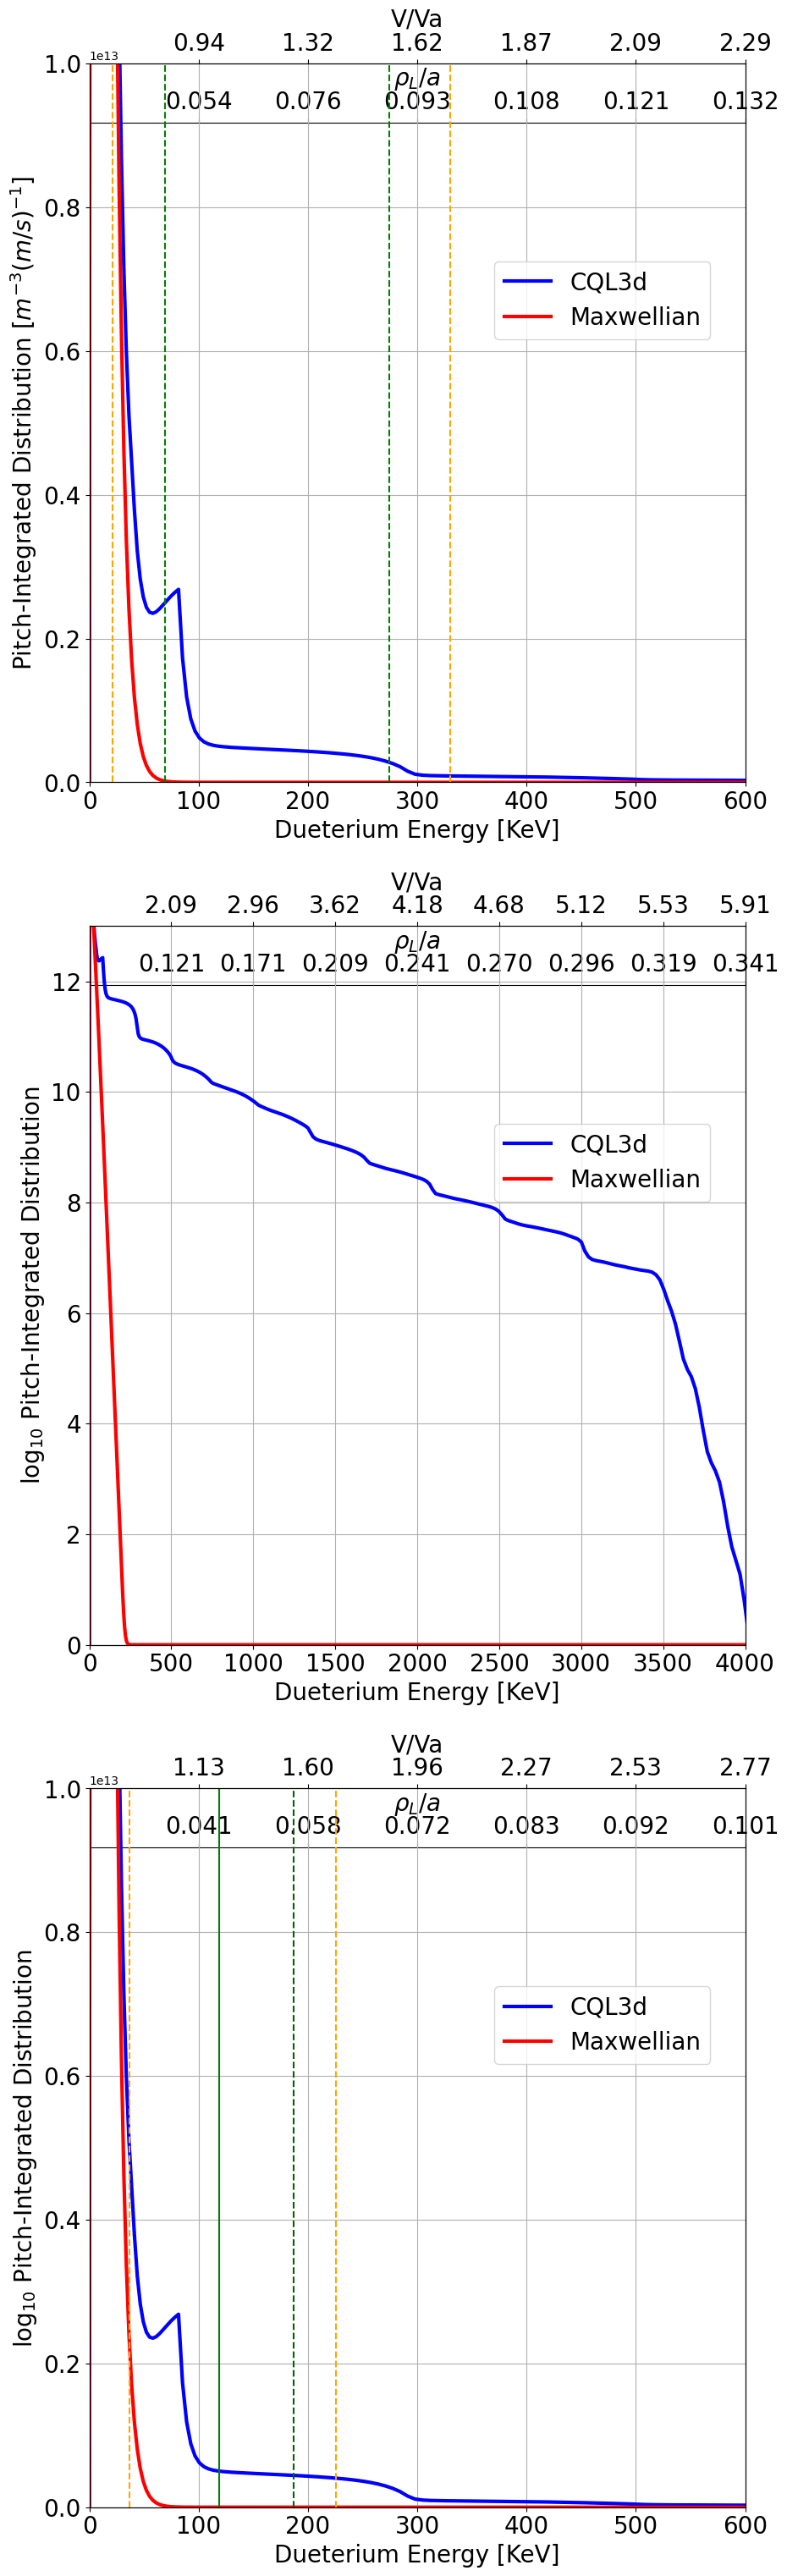

In [17]:
bbox = (0.6, 0.6)
plot_vlines = True

fig, axs = plt.subplots(3, 1,figsize=(10,25*3/2))
axs[0].plot(enerkev, integrated_over_pitch, label='CQL3d', linewidth=3, color='blue')
axs[0].plot(enerkev,  max_TH, label='Maxwellian', linewidth=3, color='red')
#plt.plot(rya, den_array/1e19, color='black', label=r'Equilibrium Deuterium and Electron Density Profile $[\times 10^{19}$ $m^{-3}$]',linewidth=3)
#plt.plot(rya, temp_e_array, color='blue', label=r'Electron Equilibrium Temperature Profile [keV]',linewidth=3)
axs[0].grid()
axs[0].set_xlabel(r'Dueterium Energy [KeV]', fontsize=20)
axs[0].set_ylabel(r'Pitch-Integrated Distribution [$m^{-3} {(m/s)}^{-1}$]', fontsize=20)
axs[0].set_xlim(0, 600)
axs[0].set_ylim(0, (1e13))
#plt.ylabel(r'Density $[\times 10^{19}$ $m^{-3}$] or temperature [keV]', fontsize=15)
axs[0].tick_params(axis='both', labelsize=20)  # Set x-axis tick label font size
axs[0].legend(fontsize=20, bbox_to_anchor=bbox, loc='lower left')

# try the twin 
def convert_kev_to_v_over_valfen(Ekev, B_center, n_center):
    E_joule = Ekev*1000*1.6022e-19
    mass_deuteron = 3.343e-27 # kg
    mu0 = 4*np.pi*1e-7
    V = np.sqrt(E_joule*2/mass_deuteron)
    rho_center = n_center*mass_deuteron
    Va = np.sqrt(B_center**2 / (mu0*rho_center))
    V_over_Va = V/Va
    return ["%.2f" % z for z in V_over_Va], V_over_Va

def get_RL_over_a(V_over_Va,  B_center, n_center, a):
    mass_deuteron = 3.343e-27 # kg
    mu0 = 4*np.pi*1e-7
    rho_center = n_center*mass_deuteron
    Va = np.sqrt(B_center**2 / (mu0*rho_center))
    V = V_over_Va * Va
    qD = 1.6022e-19
    RL =  mass_deuteron*V/(qD*B_center)
    return RL/a 

def get_Ekev_from_v_over_va(v_over_va, B, n):
    mass_deuteron = 3.343e-27 # kg
    mu0 = 4*np.pi*1e-7
    v =  v_over_va*B / np.sqrt(n*mass_deuteron*mu0)
    return 0.5*mass_deuteron*v**2 / 1.6022e-19 / 1000

def get_Ekev_from_rho_l_over_a(rho_l_over_a, B, a):
    mass_deuteron = 3.343e-27 # kg
    qD = 1.6022e-19
    v = rho_l_over_a*qD*B*a/mass_deuteron
    return 0.5*mass_deuteron*v**2 / 1.6022e-19 / 1000



B_center=1.662176343
n_center= 6e19
Bmax = 2.17#2.44188631938464#2.17#2.5
n_center_max =1.5e20# 23.717e19#1.5e20

ax0twin = axs[0].twiny()
ax0twin.set_xlim(axs[0].get_xlim())
new_tick_locations = np.array([100, 200, 300, 400, 500, 600])
ax0twin.set_xticks(new_tick_locations)
ax0twin.set_xticklabels(convert_kev_to_v_over_valfen(new_tick_locations, B_center=B_center, n_center=n_center)[0])
ax0twin.set_xlabel('V/Va', fontsize=20)
ax0twin.tick_params(axis='both', labelsize=20)

V_over_Va = convert_kev_to_v_over_valfen(new_tick_locations, B_center=B_center, n_center=n_center)[1]
rho_l_over_a = get_RL_over_a(V_over_Va=V_over_Va,  B_center=B_center, n_center=n_center, a=0.72)
print(rho_l_over_a)
ax0twin2 = axs[0].secondary_xaxis('top')
ax0twin2.set_xlabel(r'$\rho_{L}/a$', fontsize=20)
ax0twin2.set_xticks(new_tick_locations)
ax0twin2.set_xticklabels("%.3f" % z for z in rho_l_over_a)
ax0twin2.tick_params(axis='both', labelsize=20)
ax0twin2.spines['top'].set_position(('outward', -50))  # Move the bottom axis outward

#SPARC VLINES u = v/va, gamma = rhol/a
if plot_vlines:
    sparc_Ekev_from_u = get_Ekev_from_v_over_va(v_over_va=1.55, B=B_center, n=n_center)
    sparc_Ekev_from_gamma = get_Ekev_from_rho_l_over_a(rho_l_over_a=0.045, B=B_center, a=0.72)
    axs[0].axvline(x=sparc_Ekev_from_u, color='green', linestyle='--')
    axs[0].axvline(x=sparc_Ekev_from_gamma, color='green', linestyle='--')
    # ITER VLINES
    iter_Ekev_from_u = get_Ekev_from_v_over_va(v_over_va=1.7, B=B_center, n=n_center)
    iter_Ekev_from_gamma = get_Ekev_from_rho_l_over_a(rho_l_over_a=0.025, B=B_center, a=0.72)
    axs[0].axvline(x=iter_Ekev_from_u, color='orange', linestyle='--')
    axs[0].axvline(x=iter_Ekev_from_gamma, color='orange', linestyle='--')


# -----------------------------------
axs[2].plot(enerkev, integrated_over_pitch, label='CQL3d', linewidth=3, color='blue')
axs[2].plot(enerkev,   max_TH, label='Maxwellian', linewidth=3, color='red')
#plt.plot(rya, den_array/1e19, color='black', label=r'Equilibrium Deuterium and Electron Density Profile $[\times 10^{19}$ $m^{-3}$]',linewidth=3)
#plt.plot(rya, temp_e_array, color='blue', label=r'Electron Equilibrium Temperature Profile [keV]',linewidth=3)
axs[2].grid()
axs[2].set_xlabel(r'Dueterium Energy [KeV]', fontsize=20)
axs[2].set_ylabel(r'$\mathrm{log}_{10}$ Pitch-Integrated Distribution', fontsize=20)
axs[2].set_xlim(0, 600)
axs[2].set_ylim(0, 1e13)
#plt.ylabel(r'Density $[\times 10^{19}$ $m^{-3}$] or temperature [keV]', fontsize=15)
axs[2].tick_params(axis='both', labelsize=20)  # Set x-axis tick label font size
axs[2].legend(fontsize=20, loc='lower left', bbox_to_anchor=bbox)

ax1twin = axs[2].twiny()
ax1twin.set_xlim(axs[0].get_xlim())
new_tick_locations2 = np.array([100, 200, 300, 400, 500, 600])
ax1twin.set_xticks(new_tick_locations2)
ax1twin.set_xticklabels(convert_kev_to_v_over_valfen(new_tick_locations2, B_center=Bmax, n_center=n_center_max)[0])
ax1twin.set_xlabel('V/Va', fontsize=20)
ax1twin.tick_params(axis='both', labelsize=20)
print(cql_pp.rya[rho_index])

V_over_Va2 = convert_kev_to_v_over_valfen(new_tick_locations2, B_center=Bmax, n_center=n_center_max)[1]
rho_l_over_a2 = get_RL_over_a(V_over_Va=V_over_Va2,  B_center=Bmax, n_center=n_center_max, a=0.72)
print(rho_l_over_a2, np.array(rho_l_over_a[1:]) - np.array(rho_l_over_a[:-1]))
ax1twin2 = axs[2].secondary_xaxis('top')
ax1twin2.set_xlabel(r'$\rho_{L}/a$', fontsize=20)
ax1twin2.set_xticks(new_tick_locations2)
ax1twin2.set_xticklabels("%.3f" % z for z in rho_l_over_a2)
ax1twin2.tick_params(axis='both', labelsize=20)
ax1twin2.spines['top'].set_position(('outward', -50))  # Move the bottom axis outward

if plot_vlines:
    sparc_Ekev_from_u = get_Ekev_from_v_over_va(v_over_va=1.55, B=Bmax, n=n_center_max)
    sparc_Ekev_from_gamma = get_Ekev_from_rho_l_over_a(rho_l_over_a=0.045, B=Bmax, a=0.72)
    axs[2].axvline(x=sparc_Ekev_from_u, color='darkgreen', linestyle='dashed')
    axs[2].axvline(x=sparc_Ekev_from_gamma, color='green', linestyle='solid')
    # ITER VLINES
    iter_Ekev_from_u = get_Ekev_from_v_over_va(v_over_va=1.7, B=Bmax, n=n_center_max)
    iter_Ekev_from_gamma = get_Ekev_from_rho_l_over_a(rho_l_over_a=0.025, B=Bmax, a=0.72)
    axs[2].axvline(x=iter_Ekev_from_u, color='orange', linestyle='--')
    axs[2].axvline(x=iter_Ekev_from_gamma, color='orange', linestyle='--')
#HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
# ---------------------------------------
# new plot with shifted positions 
axs[1].plot(enerkev, np.log10(integrated_over_pitch+1), label='CQL3d', linewidth=3, color='blue')
axs[1].plot(enerkev,   np.log10(max_TH+1), label='Maxwellian', linewidth=3, color='red')
#plt.plot(rya, den_array/1e19, color='black', label=r'Equilibrium Deuterium and Electron Density Profile $[\times 10^{19}$ $m^{-3}$]',linewidth=3)
#plt.plot(rya, temp_e_array, color='blue', label=r'Electron Equilibrium Temperature Profile [keV]',linewidth=3)
axs[1].grid()
axs[1].set_xlabel(r'Dueterium Energy [KeV]', fontsize=20)
axs[1].set_ylabel(r'$\mathrm{log}_{10}$ Pitch-Integrated Distribution', fontsize=20)
axs[1].set_xlim(0, 4000)
axs[1].set_ylim(0, (np.log10(1e13)))
#plt.ylabel(r'Density $[\times 10^{19}$ $m^{-3}$] or temperature [keV]', fontsize=15)
axs[1].tick_params(axis='both', labelsize=20)  # Set x-axis tick label font size
axs[1].legend(fontsize=20, loc='lower left', bbox_to_anchor=bbox)

ax1twin = axs[1].twiny()
ax1twin.set_xlim(axs[0].get_xlim())
new_tick_locations2 = np.array([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])
ax1twin.set_xticks(new_tick_locations2)
ax1twin.set_xticklabels(convert_kev_to_v_over_valfen(new_tick_locations2, B_center=B_center, n_center=n_center)[0])
ax1twin.set_xlabel('V/Va', fontsize=20)
ax1twin.tick_params(axis='both', labelsize=20)
print(cql_pp.rya[rho_index])

V_over_Va2 = convert_kev_to_v_over_valfen(new_tick_locations2, B_center=B_center, n_center=n_center)[1]
rho_l_over_a2 = get_RL_over_a(V_over_Va=V_over_Va2,  B_center=B_center, n_center=n_center, a=0.72)
print(rho_l_over_a2, np.array(rho_l_over_a[1:]) - np.array(rho_l_over_a[:-1]))
ax1twin2 = axs[1].secondary_xaxis('top')
ax1twin2.set_xlabel(r'$\rho_{L}/a$', fontsize=20)
ax1twin2.set_xticks(new_tick_locations2)
ax1twin2.set_xticklabels("%.3f" % z for z in rho_l_over_a2)
ax1twin2.tick_params(axis='both', labelsize=20)
ax1twin2.spines['top'].set_position(('outward', -50))  # Move the bottom axis outward



print(get_RL_over_a(V_over_Va=1.55,  B_center=B_center, n_center=n_center, a=0.72))
save_figure_data_to_hdf5(fig, 'figure8.h5')


[0.05397781 0.07633615 0.0934923  0.10795561 0.12069804 0.13221808]
0.0462963
[0.12069804 0.17069281 0.20905514 0.24139609 0.26988903 0.29564862
 0.31933701 0.34138562] [0.02235834 0.01715616 0.01446331 0.01274243 0.01152004]
0.08946848954891602


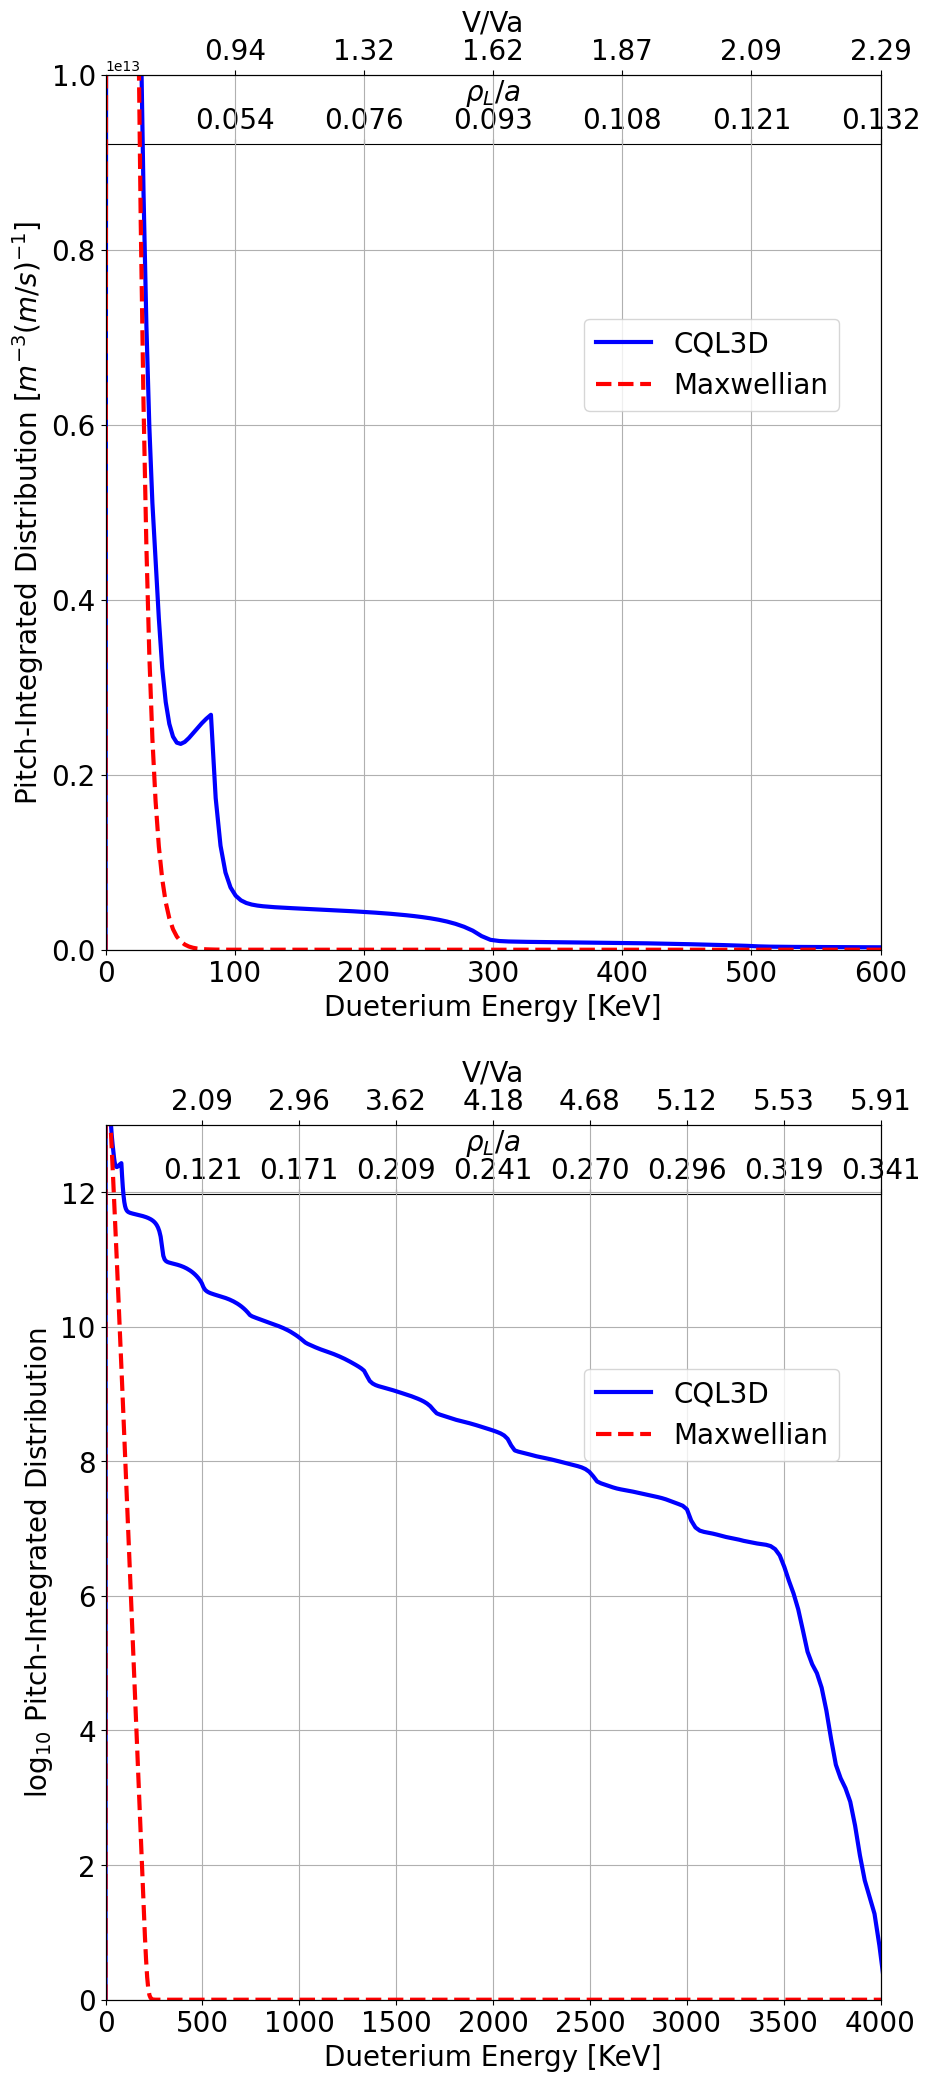

In [59]:
# same figure but smaller 
bbox = (0.6, 0.6)
plot_vlines = False

fig, axs = plt.subplots(2, 1,figsize=(10,25))
axs[0].plot(enerkev, integrated_over_pitch, label='CQL3D', linewidth=3, color='blue')
axs[0].plot(enerkev,  max_TH, label='Maxwellian', linewidth=3, color='red', linestyle='--')
#plt.plot(rya, den_array/1e19, color='black', label=r'Equilibrium Deuterium and Electron Density Profile $[\times 10^{19}$ $m^{-3}$]',linewidth=3)
#plt.plot(rya, temp_e_array, color='blue', label=r'Electron Equilibrium Temperature Profile [keV]',linewidth=3)
axs[0].grid()
axs[0].set_xlabel(r'Dueterium Energy [KeV]', fontsize=20)
axs[0].set_ylabel(r'Pitch-Integrated Distribution [$m^{-3} {(m/s)}^{-1}$]', fontsize=20)
axs[0].set_xlim(0, 600)
axs[0].set_ylim(0, (1e13))
#plt.ylabel(r'Density $[\times 10^{19}$ $m^{-3}$] or temperature [keV]', fontsize=15)
axs[0].tick_params(axis='both', labelsize=20)  # Set x-axis tick label font size
axs[0].legend(fontsize=20, bbox_to_anchor=bbox, loc='lower left')

# try the twin 

B_center=1.662176343
n_center= 6e19
Bmax = 2.17#2.44188631938464#2.17#2.5
n_center_max =1.5e20# 23.717e19#1.5e20

ax0twin = axs[0].twiny()
ax0twin.set_xlim(axs[0].get_xlim())
new_tick_locations = np.array([100, 200, 300, 400, 500, 600])
ax0twin.set_xticks(new_tick_locations)
ax0twin.set_xticklabels(convert_kev_to_v_over_valfen(new_tick_locations, B_center=B_center, n_center=n_center)[0])
ax0twin.set_xlabel('V/Va', fontsize=20)
ax0twin.tick_params(axis='both', labelsize=20)

V_over_Va = convert_kev_to_v_over_valfen(new_tick_locations, B_center=B_center, n_center=n_center)[1]
rho_l_over_a = get_RL_over_a(V_over_Va=V_over_Va,  B_center=B_center, n_center=n_center, a=0.72)
print(rho_l_over_a)
ax0twin2 = axs[0].secondary_xaxis('top')
ax0twin2.set_xlabel(r'$\rho_{L}/a$', fontsize=20)
ax0twin2.set_xticks(new_tick_locations)
ax0twin2.set_xticklabels("%.3f" % z for z in rho_l_over_a)
ax0twin2.tick_params(axis='both', labelsize=20)
ax0twin2.spines['top'].set_position(('outward', -50))  # Move the bottom axis outward

#SPARC VLINES u = v/va, gamma = rhol/a
if plot_vlines:
    sparc_Ekev_from_u = get_Ekev_from_v_over_va(v_over_va=1.55, B=B_center, n=n_center)
    sparc_Ekev_from_gamma = get_Ekev_from_rho_l_over_a(rho_l_over_a=0.045, B=B_center, a=0.72)
    axs[0].axvline(x=sparc_Ekev_from_u, color='green', linestyle='--')
    axs[0].axvline(x=sparc_Ekev_from_gamma, color='green', linestyle='--')
    # ITER VLINES
    iter_Ekev_from_u = get_Ekev_from_v_over_va(v_over_va=1.7, B=B_center, n=n_center)
    iter_Ekev_from_gamma = get_Ekev_from_rho_l_over_a(rho_l_over_a=0.025, B=B_center, a=0.72)
    axs[0].axvline(x=iter_Ekev_from_u, color='orange', linestyle='--')
    axs[0].axvline(x=iter_Ekev_from_gamma, color='orange', linestyle='--')


# -----------------------------------
#HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH
# ---------------------------------------
# new plot with shifted positions 
axs[1].plot(enerkev, np.log10(integrated_over_pitch+1), label='CQL3D', linewidth=3, color='blue')
axs[1].plot(enerkev,   np.log10(max_TH+1), label='Maxwellian', linewidth=3, color='red', linestyle='--')
#plt.plot(rya, den_array/1e19, color='black', label=r'Equilibrium Deuterium and Electron Density Profile $[\times 10^{19}$ $m^{-3}$]',linewidth=3)
#plt.plot(rya, temp_e_array, color='blue', label=r'Electron Equilibrium Temperature Profile [keV]',linewidth=3)
axs[1].grid()
axs[1].set_xlabel(r'Dueterium Energy [KeV]', fontsize=20)
axs[1].set_ylabel(r'$\mathrm{log}_{10}$ Pitch-Integrated Distribution', fontsize=20)
axs[1].set_xlim(0, 4000)
axs[1].set_ylim(0, (np.log10(1e13)))
#plt.ylabel(r'Density $[\times 10^{19}$ $m^{-3}$] or temperature [keV]', fontsize=15)
axs[1].tick_params(axis='both', labelsize=20)  # Set x-axis tick label font size
axs[1].legend(fontsize=20, loc='lower left', bbox_to_anchor=bbox)

ax1twin = axs[1].twiny()
ax1twin.set_xlim(axs[0].get_xlim())
new_tick_locations2 = np.array([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])
ax1twin.set_xticks(new_tick_locations2)
ax1twin.set_xticklabels(convert_kev_to_v_over_valfen(new_tick_locations2, B_center=B_center, n_center=n_center)[0])
ax1twin.set_xlabel('V/Va', fontsize=20)
ax1twin.tick_params(axis='both', labelsize=20)
print(cql_pp.rya[rho_index])

V_over_Va2 = convert_kev_to_v_over_valfen(new_tick_locations2, B_center=B_center, n_center=n_center)[1]
rho_l_over_a2 = get_RL_over_a(V_over_Va=V_over_Va2,  B_center=B_center, n_center=n_center, a=0.72)
print(rho_l_over_a2, np.array(rho_l_over_a[1:]) - np.array(rho_l_over_a[:-1]))
ax1twin2 = axs[1].secondary_xaxis('top')
ax1twin2.set_xlabel(r'$\rho_{L}/a$', fontsize=20)
ax1twin2.set_xticks(new_tick_locations2)
ax1twin2.set_xticklabels("%.3f" % z for z in rho_l_over_a2)
ax1twin2.tick_params(axis='both', labelsize=20)
ax1twin2.spines['top'].set_position(('outward', -50))  # Move the bottom axis outward



print(get_RL_over_a(V_over_Va=1.55,  B_center=B_center, n_center=n_center, a=0.72))

In [37]:
# NEW SECTION FOR +/- 10 percent 

# plus
eqdsk_file = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/g147634.04525"
cql3d_nc_file_plus10 = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/cql3d_plus10percent.nc"
cql3d_krf_nc_file_plus10 = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/cql3d_krf_plus10percent.nc"
cqlin_file = None#"

cql_pp_plus10 = CQL3D_Analysis.CQL3D_Post_Process(
    gen_species_names=["D", "e"],
    cql3d_nc_file=cql3d_nc_file_plus10,
    cql3d_krf_file=cql3d_krf_nc_file_plus10,
    eqdsk_file=eqdsk_file,
    cql_input_file=cqlin_file,
)


['   90   86\n']


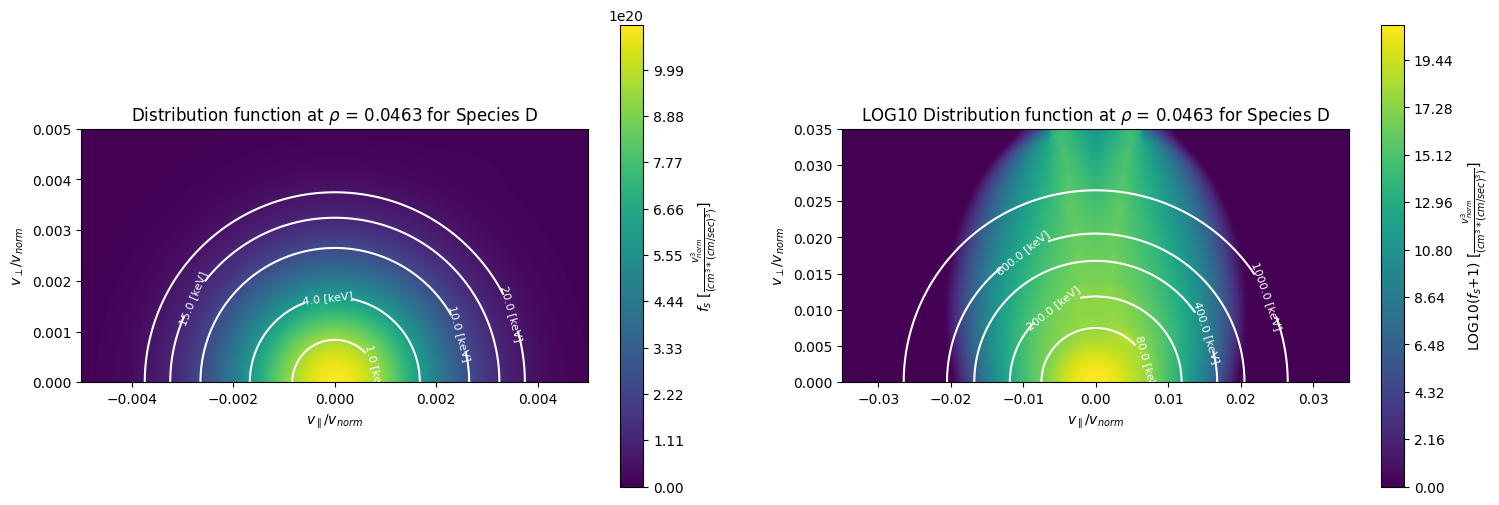

In [38]:
rho_index=2#2
cql_pp_plus10.plot_species_distribution_function_at_rho(
    gen_species_index=0,
    rho_index=rho_index,
    figsize=(18, 6),
    cmap="viridis",
    v_norm_over_v_max=0.005,
    log_scale_axis_multiple=7,
    energy_levels_linear=[1, 4, 10, 15, 20],
    energy_levels_log=[80, 200, 400, 600, 1000],
    energy_color="white",
)

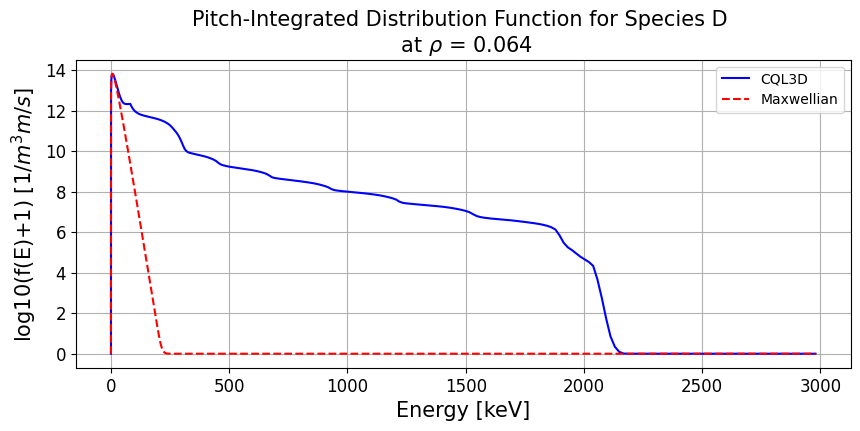

In [39]:
cql_pp_plus10.plot_pitch_integrated_distribution_function_versus_maxwellian(
    nmax=5.97e19,
    Tmax=5.89,
    gen_species_index=0,
    rho_index=3,
    Emax_keV=3000,
    ylim=None,
    figsize=(10, 4),
    log10=True,
    color="blue",
    maxwell_color="red",
)

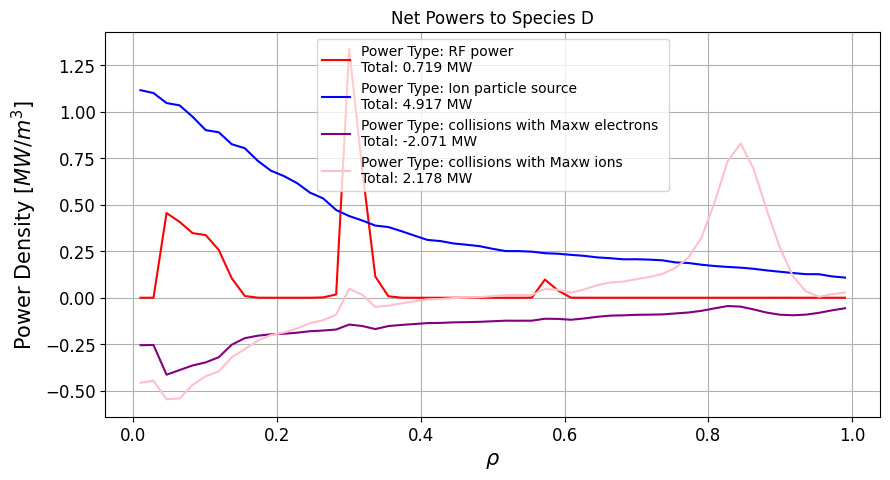

In [40]:
power_types = [
    "RF power",
    "Ion particle source",
    "collisions with Maxw electrons",
    "collisions with Maxw ions",
]
colors = ["red", "blue", "purple", "pink"]

cql_pp_plus10.plot_powers_vs_rho(
    gen_species_index=0, power_types=power_types, figsize=(10, 5), colors=colors
)

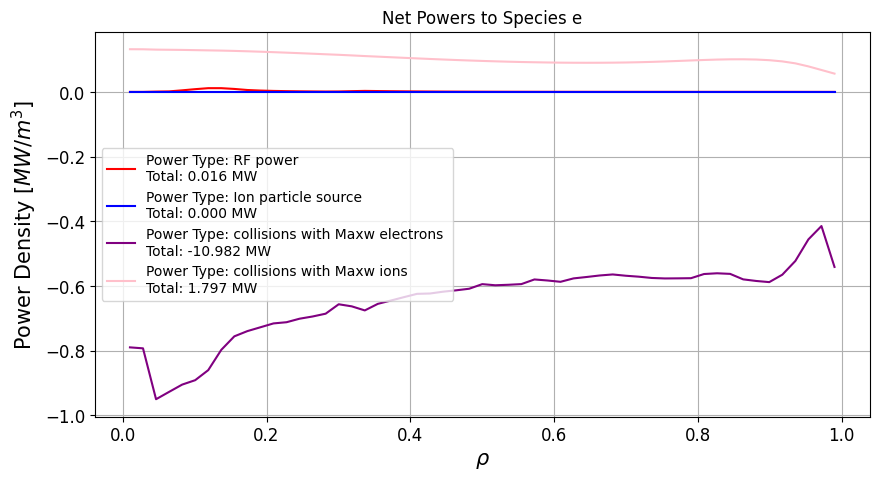

In [41]:
power_types = [
    "RF power",
    "Ion particle source",
    "collisions with Maxw electrons",
    "collisions with Maxw ions",
]
colors = ["red", "blue", "purple", "pink"]

cql_pp_plus10.plot_powers_vs_rho(
    gen_species_index=1, power_types=power_types, figsize=(10, 5), colors=colors
)

In [42]:
# calculate RF powers to species 
total_ionRF_power = cql_pp_plus10.get_power_vs_rho(gen_species_index=0, power_type='RF power')[1]
total_eRF_power = cql_pp_plus10.get_power_vs_rho(gen_species_index=1, power_type='RF power')[1]

print(f'Total ion RF power: {total_ionRF_power} MW')
print(f'Total elc RF power: {total_eRF_power} MW')

ionfrac = total_ionRF_power / (total_ionRF_power + total_eRF_power)
elecfrac = total_eRF_power / (total_ionRF_power + total_eRF_power)
print(f'Total ion RF power frac: {ionfrac*100} %')
print(f'Total elc RF power frac: {elecfrac*100} %')

Total ion RF power: 0.7188507189776406 MW
Total elc RF power: 0.015516293209837188 MW
Total ion RF power frac: 97.88712007043749 %
Total elc RF power frac: 2.1128799295625234 %


161923373.38298452
11.33110858566313


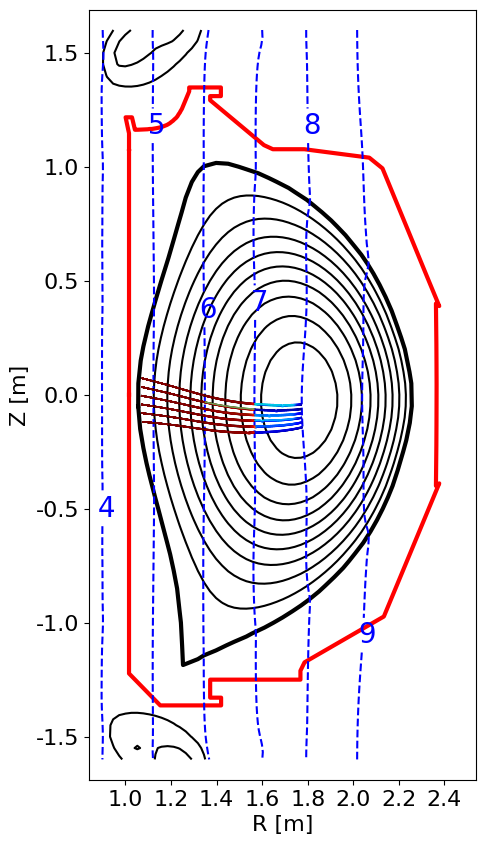

In [43]:
fig, ax = cql_pp_plus10.plot_cyclotron_harmonics(
    frequency=96e6,
    harmonics=[4,5,6,7,8,9],
    species_mass=cql_pp.species_mass[0],
    species_charge=cql_pp.species_charges[0],
    r_resolution=100,
    z_resolution=100,
    levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    figsize=(5, 10),
    fontsize=16,
    harmonic_color="blue",
    plot_rays=True,
    maxDelPwrPlot=0.99,
    return_plot=True,
)

In [44]:
# minus 
eqdsk_file = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/g147634.04525"
cql3d_nc_file_minus10 = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/cql3d_minus10percent.nc"
cql3d_krf_nc_file_minus10 = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/cql3d_krf_minus10percent.nc"
cqlin_file = None#"

cql_pp_minus10 = CQL3D_Analysis.CQL3D_Post_Process(
    gen_species_names=["D", "e"],
    cql3d_nc_file=cql3d_nc_file_minus10,
    cql3d_krf_file=cql3d_krf_nc_file_minus10,
    eqdsk_file=eqdsk_file,
    cql_input_file=cqlin_file,
)

['   90   86\n']


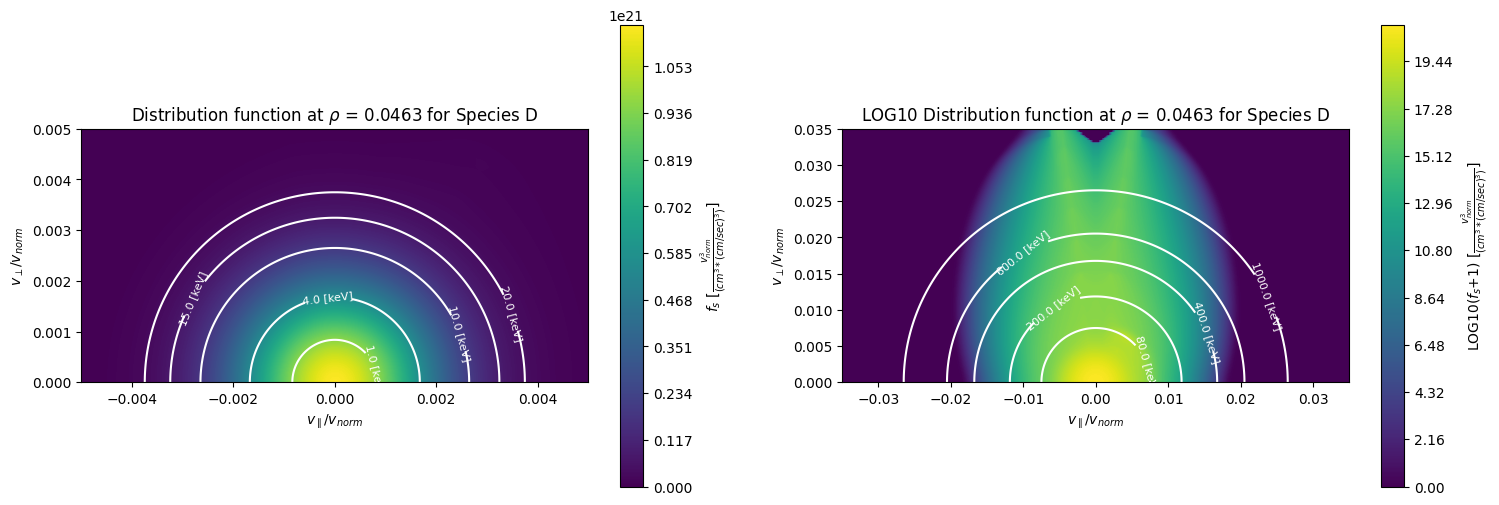

In [45]:
rho_index=2#2
cql_pp_minus10.plot_species_distribution_function_at_rho(
    gen_species_index=0,
    rho_index=rho_index,
    figsize=(18, 6),
    cmap="viridis",
    v_norm_over_v_max=0.005,
    log_scale_axis_multiple=7,
    energy_levels_linear=[1, 4, 10, 15, 20],
    energy_levels_log=[80, 200, 400, 600, 1000],
    energy_color="white",
)

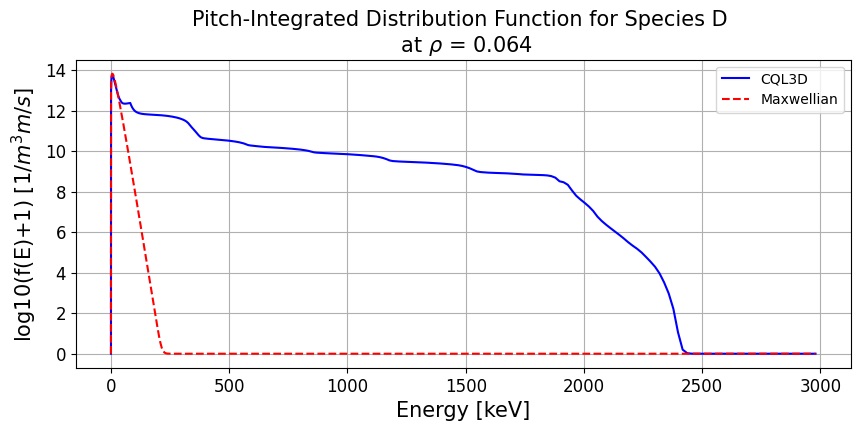

In [46]:
cql_pp_minus10.plot_pitch_integrated_distribution_function_versus_maxwellian(
    nmax=5.97e19,
    Tmax=5.89,
    gen_species_index=0,
    rho_index=3,
    Emax_keV=3000,
    ylim=None,
    figsize=(10, 4),
    log10=True,
    color="blue",
    maxwell_color="red",
)

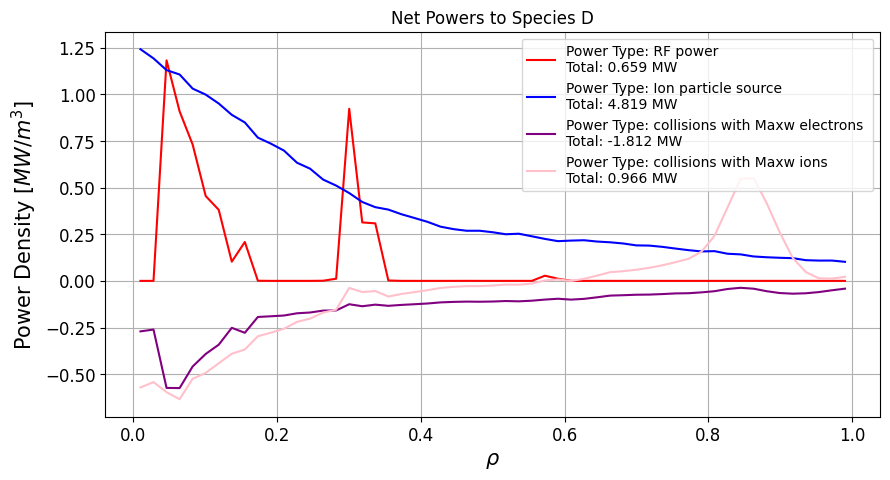

In [47]:
power_types = [
    "RF power",
    "Ion particle source",
    "collisions with Maxw electrons",
    "collisions with Maxw ions",
]
colors = ["red", "blue", "purple", "pink"]

cql_pp_minus10.plot_powers_vs_rho(
    gen_species_index=0, power_types=power_types, figsize=(10, 5), colors=colors
)

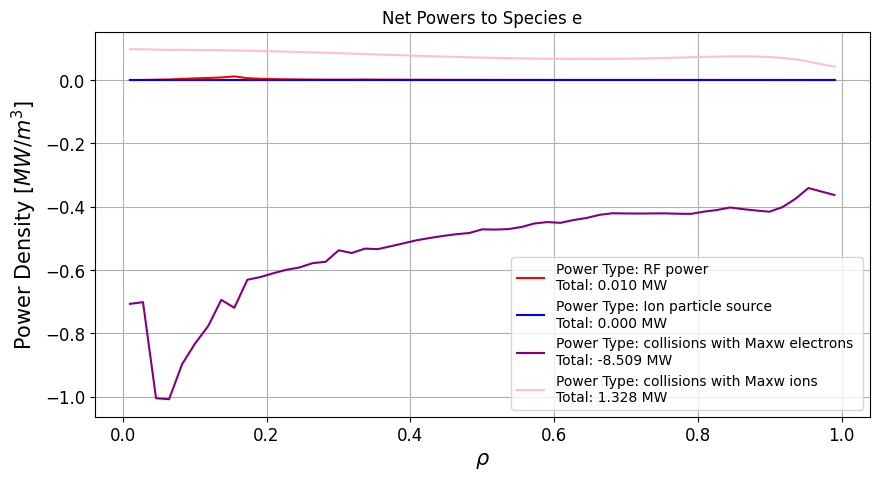

In [48]:
power_types = [
    "RF power",
    "Ion particle source",
    "collisions with Maxw electrons",
    "collisions with Maxw ions",
]
colors = ["red", "blue", "purple", "pink"]

cql_pp_minus10.plot_powers_vs_rho(
    gen_species_index=1, power_types=power_types, figsize=(10, 5), colors=colors
)

In [49]:
# calculate RF powers to species 
total_ionRF_power = cql_pp_minus10.get_power_vs_rho(gen_species_index=0, power_type='RF power')[1]
total_eRF_power = cql_pp_minus10.get_power_vs_rho(gen_species_index=1, power_type='RF power')[1]

print(f'Total ion RF power: {total_ionRF_power} MW')
print(f'Total elc RF power: {total_eRF_power} MW')

ionfrac = total_ionRF_power / (total_ionRF_power + total_eRF_power)
elecfrac = total_eRF_power / (total_ionRF_power + total_eRF_power)
print(f'Total ion RF power frac: {ionfrac*100} %')
print(f'Total elc RF power frac: {elecfrac*100} %')

Total ion RF power: 0.6592556312520715 MW
Total elc RF power: 0.010048377482921023 MW
Total ion RF power frac: 98.49868260883231 %
Total elc RF power frac: 1.5013173911676998 %


161923373.38298452
11.33110858566313


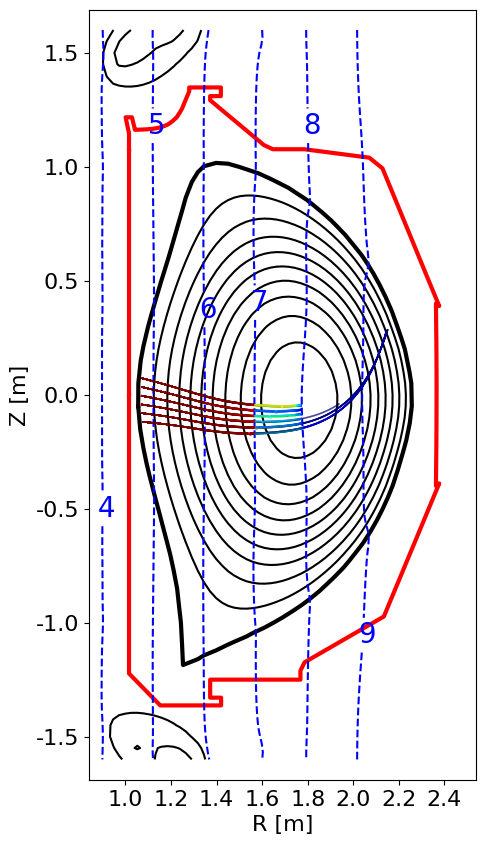

In [50]:
fig, ax = cql_pp_minus10.plot_cyclotron_harmonics(
    frequency=96e6,
    harmonics=[4,5,6,7,8,9],
    species_mass=cql_pp.species_mass[0],
    species_charge=cql_pp.species_charges[0],
    r_resolution=100,
    z_resolution=100,
    levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    figsize=(5, 10),
    fontsize=16,
    harmonic_color="blue",
    plot_rays=True,
    maxDelPwrPlot=0.99,
    return_plot=True,
)

In [51]:
# power scan area. 
# load up array 
scan_list = ['500', '600', '700', '800']
cql_pp_list = []
cql3d_nc_file_list = []
cql3d_krf_nc_file_list = []
eqdsk_file = "/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/g147634.04525"

for tag in scan_list:
    cql3d_nc_file_list.append(f'/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/cql3d_RF_{tag}.nc')
    cql3d_krf_nc_file_list.append(f'/home/jacobvandelindt/aorsa_cql_mcgo_toolkit/shots/147634/cql3d_krf_RF_{tag}.nc')

for i in range(len(scan_list)):
    cql_pp_i = CQL3D_Analysis.CQL3D_Post_Process(
    gen_species_names=["D", "e"],
    cql3d_nc_file=cql3d_nc_file_list[i],
    cql3d_krf_file=cql3d_krf_nc_file_list[i],
    eqdsk_file=eqdsk_file,
    cql_input_file=None,
    )
    cql_pp_list.append(cql_pp_i)

['   90   86\n']
['   90   86\n']
['   90   86\n']
['   90   86\n']


161923373.38298452
11.33110858566313


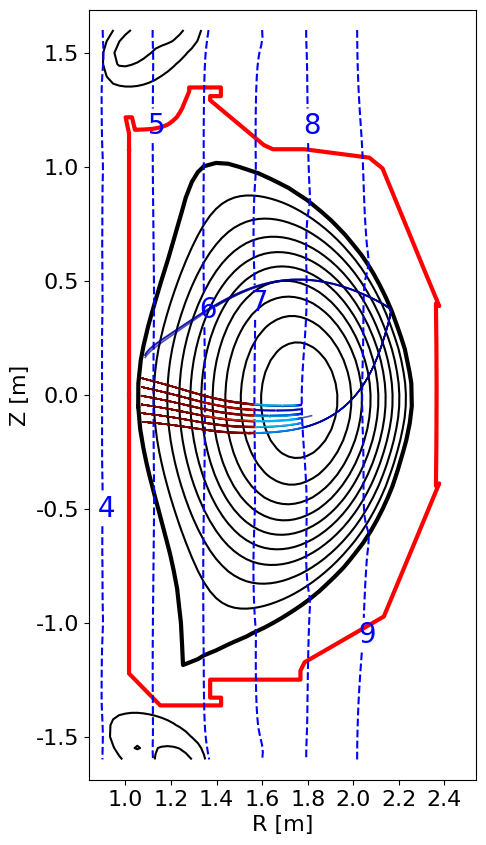

In [52]:
tag = '500'
index = scan_list.index(tag)
fig, ax = cql_pp_list[index].plot_cyclotron_harmonics(
    frequency=96e6,
    harmonics=[4,5,6,7,8,9],
    species_mass=cql_pp.species_mass[0],
    species_charge=cql_pp.species_charges[0],
    r_resolution=100,
    z_resolution=100,
    levels=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    figsize=(5, 10),
    fontsize=16,
    harmonic_color="blue",
    plot_rays=True,
    maxDelPwrPlot=0.99,
    return_plot=True,
)

In [53]:
for tag in scan_list:
    print(tag)
    index = scan_list.index(tag)
    # calculate RF powers to species 
    total_ionRF_power = cql_pp_list[index].get_power_vs_rho(gen_species_index=0, power_type='RF power')[1]
    total_eRF_power = cql_pp_list[index].get_power_vs_rho(gen_species_index=1, power_type='RF power')[1]

    print(f'Total ion RF power: {total_ionRF_power} MW')
    print(f'Total elc RF power: {total_eRF_power} MW')

    ionfrac = total_ionRF_power / (total_ionRF_power + total_eRF_power)
    elecfrac = total_eRF_power / (total_ionRF_power + total_eRF_power)
    print(f'Total ion RF power frac: {ionfrac*100} %')
    print(f'Total elc RF power frac: {elecfrac*100} %')

500
Total ion RF power: 0.514918399029132 MW
Total elc RF power: 0.009492947912754804 MW
Total ion RF power frac: 98.18978975796136 %
Total elc RF power frac: 1.810210242038637 %
600
Total ion RF power: 0.6135935510862146 MW
Total elc RF power: 0.012327112024869543 MW
Total ion RF power frac: 98.0305631765536 %
Total elc RF power frac: 1.9694368234463941 %
700
Total ion RF power: 0.6708690394576129 MW
Total elc RF power: 0.012449527925202092 MW
Total ion RF power frac: 98.17807849523464 %
Total elc RF power frac: 1.8219215047653614 %
800
Total ion RF power: 0.8769428280075208 MW
Total elc RF power: 0.0204994452467886 MW
Total ion RF power frac: 97.71579232918755 %
Total elc RF power frac: 2.2842076708124543 %


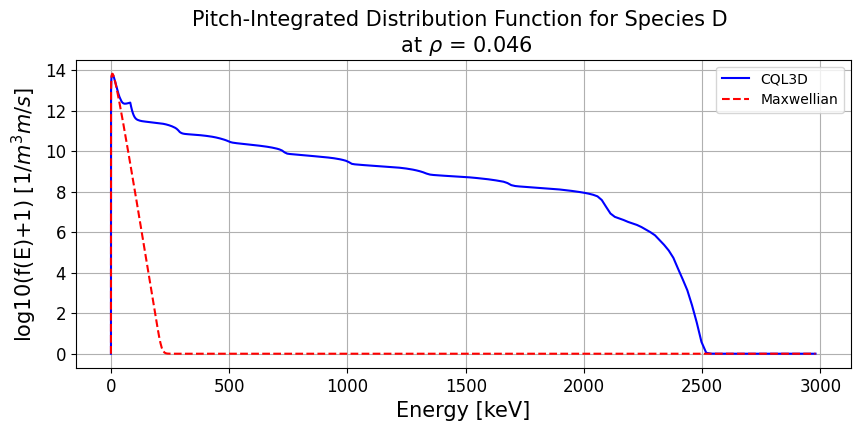

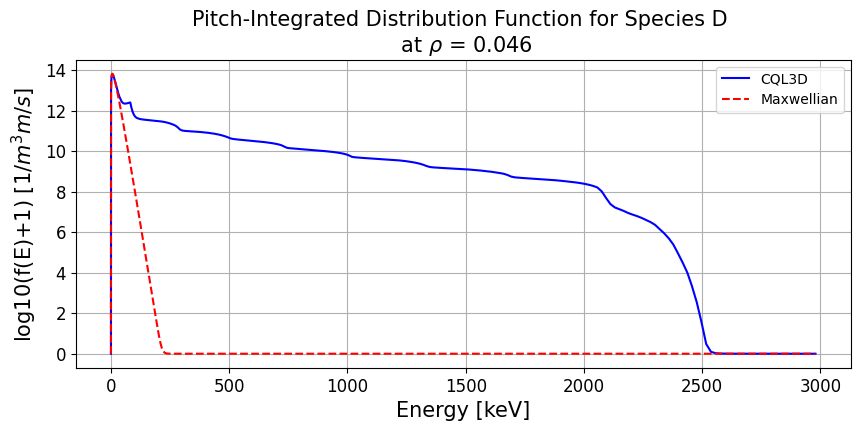

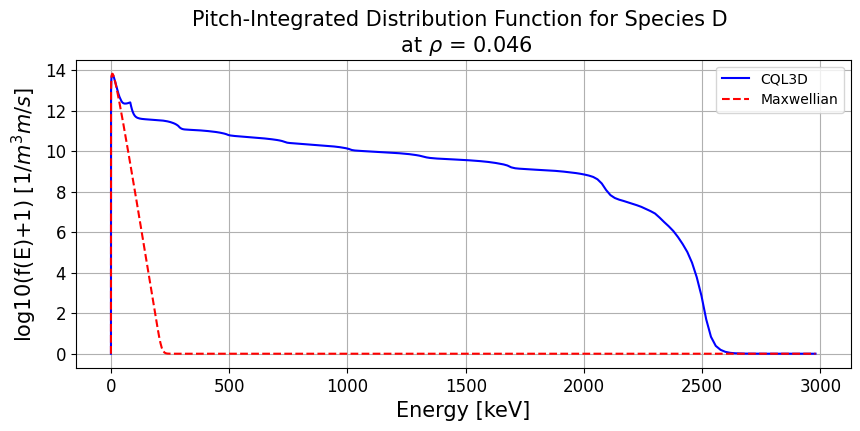

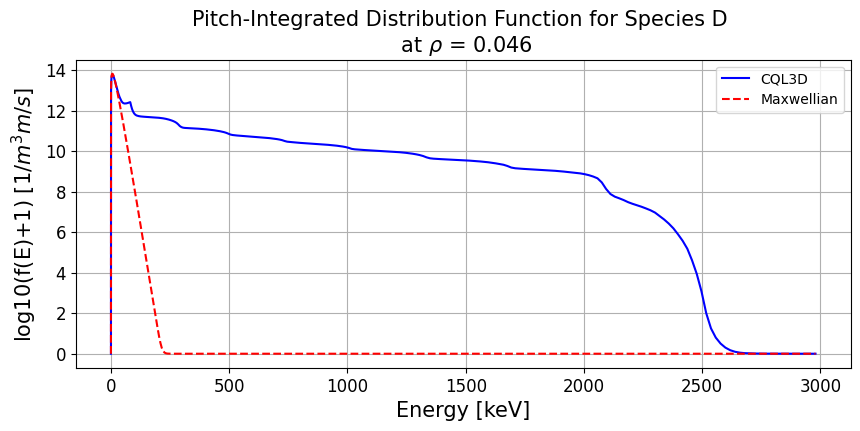

In [54]:
for tag in scan_list:
    index = scan_list.index(tag)
    cql_pp_list[index].plot_pitch_integrated_distribution_function_versus_maxwellian(
    nmax=5.97e19,
    Tmax=5.89,
    gen_species_index=0,
    rho_index=2,
    Emax_keV=3000,
    ylim=None,
    figsize=(10, 4),
    log10=True,
    color="blue",
    maxwell_color="red",
    )
    
